In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.transform import Rotation as r

In [12]:
def func(T, trans, phi, theta):

    # extract Tx values
    Ta, Tb, Tc = trans
    
    return Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
           Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
           Tc * np.cos(phi)**2 - \
           T

In [13]:
# generate data all along the space
theta = np.linspace(0, 2*np.pi, 100)
phi = np.arccos(1 - 2 * np.linspace(0, 1, 100))
phi, theta = np.meshgrid(phi, theta)

results = func(T=50, trans=(90, 50, 20), phi=phi, theta=theta)

In [15]:
results.min(), results.max()

(-30.0, 39.99285787164574)

check when $results \thickapprox 0$

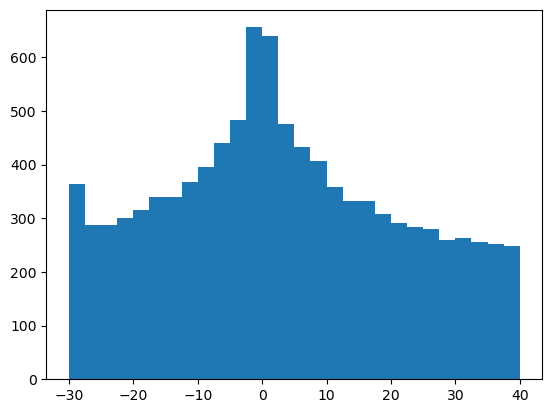

In [21]:
_ = plt.hist(results.ravel(), bins='fd')

In [37]:
theta[(results > -0.005) & (results < 0.005)]

array([1.65012947, 1.65012947, 4.63305583, 4.63305583])

In [38]:
results[(results > -0.005) & (results < 0.005)]

array([0.00121213, 0.00121213, 0.00121213, 0.00121213])

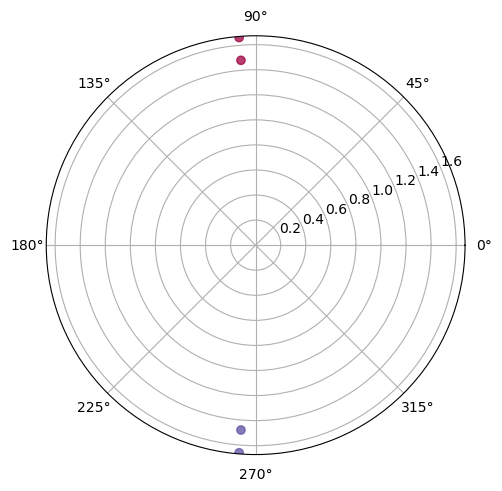

In [29]:
# make plot
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, constrained_layout=True)
_ = ax.scatter(theta[(results > -0.005) & (results < 0.005)],
               phi[(results > -0.005) & (results < 0.005)],
               c=results[(results > -0.005) & (results < 0.005)],
               cmap='Spectral_r', alpha=0.75)